In [27]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns
import src.bayesian_stats as bst
import xarray as xr

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v4.2.2


In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
az.rcParams["stats.hdi_prob"] = 0.95

In [3]:
df = pd.read_csv('../kruschke_data/FruitflyDataReduced.csv', dtype={'CompanionNumber':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Longevity        125 non-null    int64   
 1   CompanionNumber  125 non-null    category
 2   Thorax           125 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 2.4 KB


In [4]:
df.groupby('CompanionNumber').head(2)

Longevity CompanionNumber  Thorax
0           35       Pregnant8    0.64
1           37       Pregnant8    0.68
25          40           None0    0.64
26          37           None0    0.70
50          46       Pregnant1    0.64
51          42       Pregnant1    0.68
75          21         Virgin1    0.68
76          40         Virgin1    0.68
100         16         Virgin8    0.64
101         19         Virgin8    0.64

In [5]:
# Count the number of records per nominal group
df.CompanionNumber.value_counts()


None0        25
Pregnant1    25
Pregnant8    25
Virgin1      25
Virgin8      25
Name: CompanionNumber, dtype: int64

In [6]:
x = df.CompanionNumber
y = df.Longevity
mu_y = y.mean()
sigma_y = y.std()

In [7]:
model, idata = bst.metric_outcome_one_nominal_predictor(x, y, mu_y, sigma_y, n_draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_a, a0, a, sigma_y]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 29 seconds.
The acceptance probability does not match the target. It is 0.891, but should be close to 0.8. Try to increase the number of tuning steps.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.2811, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8824, but should be close to 0.8. Try to increase the number of tuning steps.


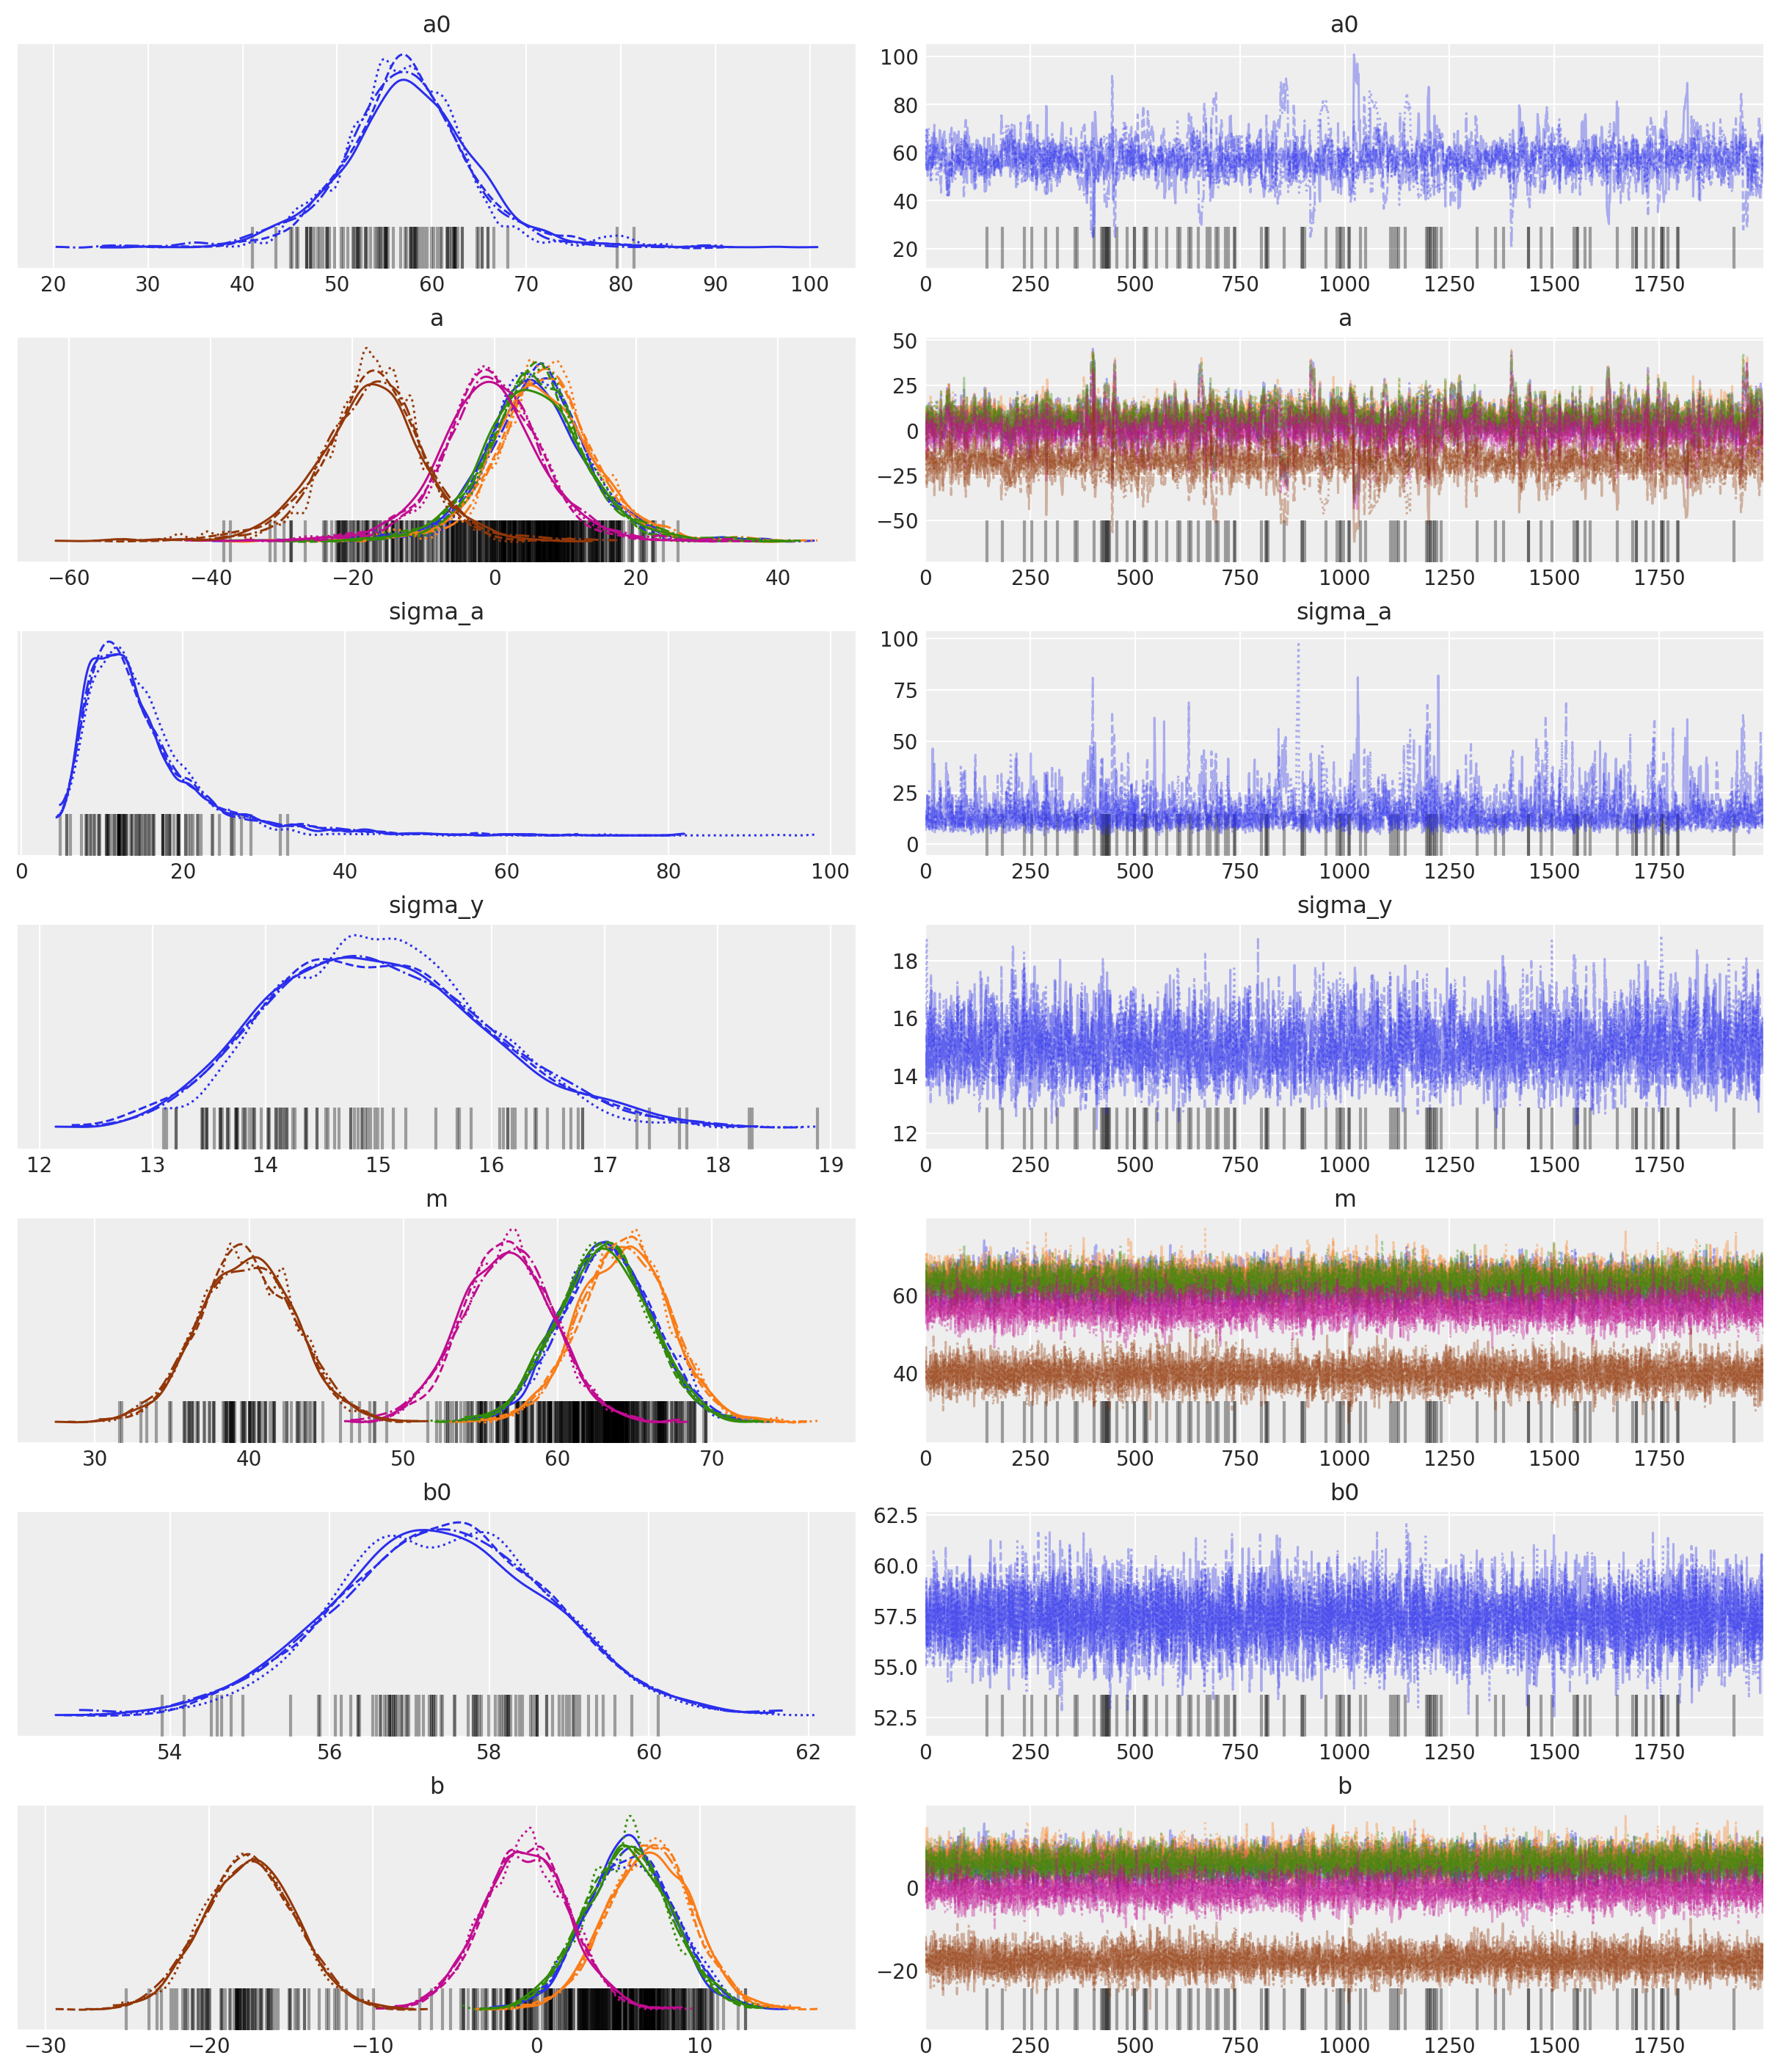

In [8]:
az.plot_trace(idata);

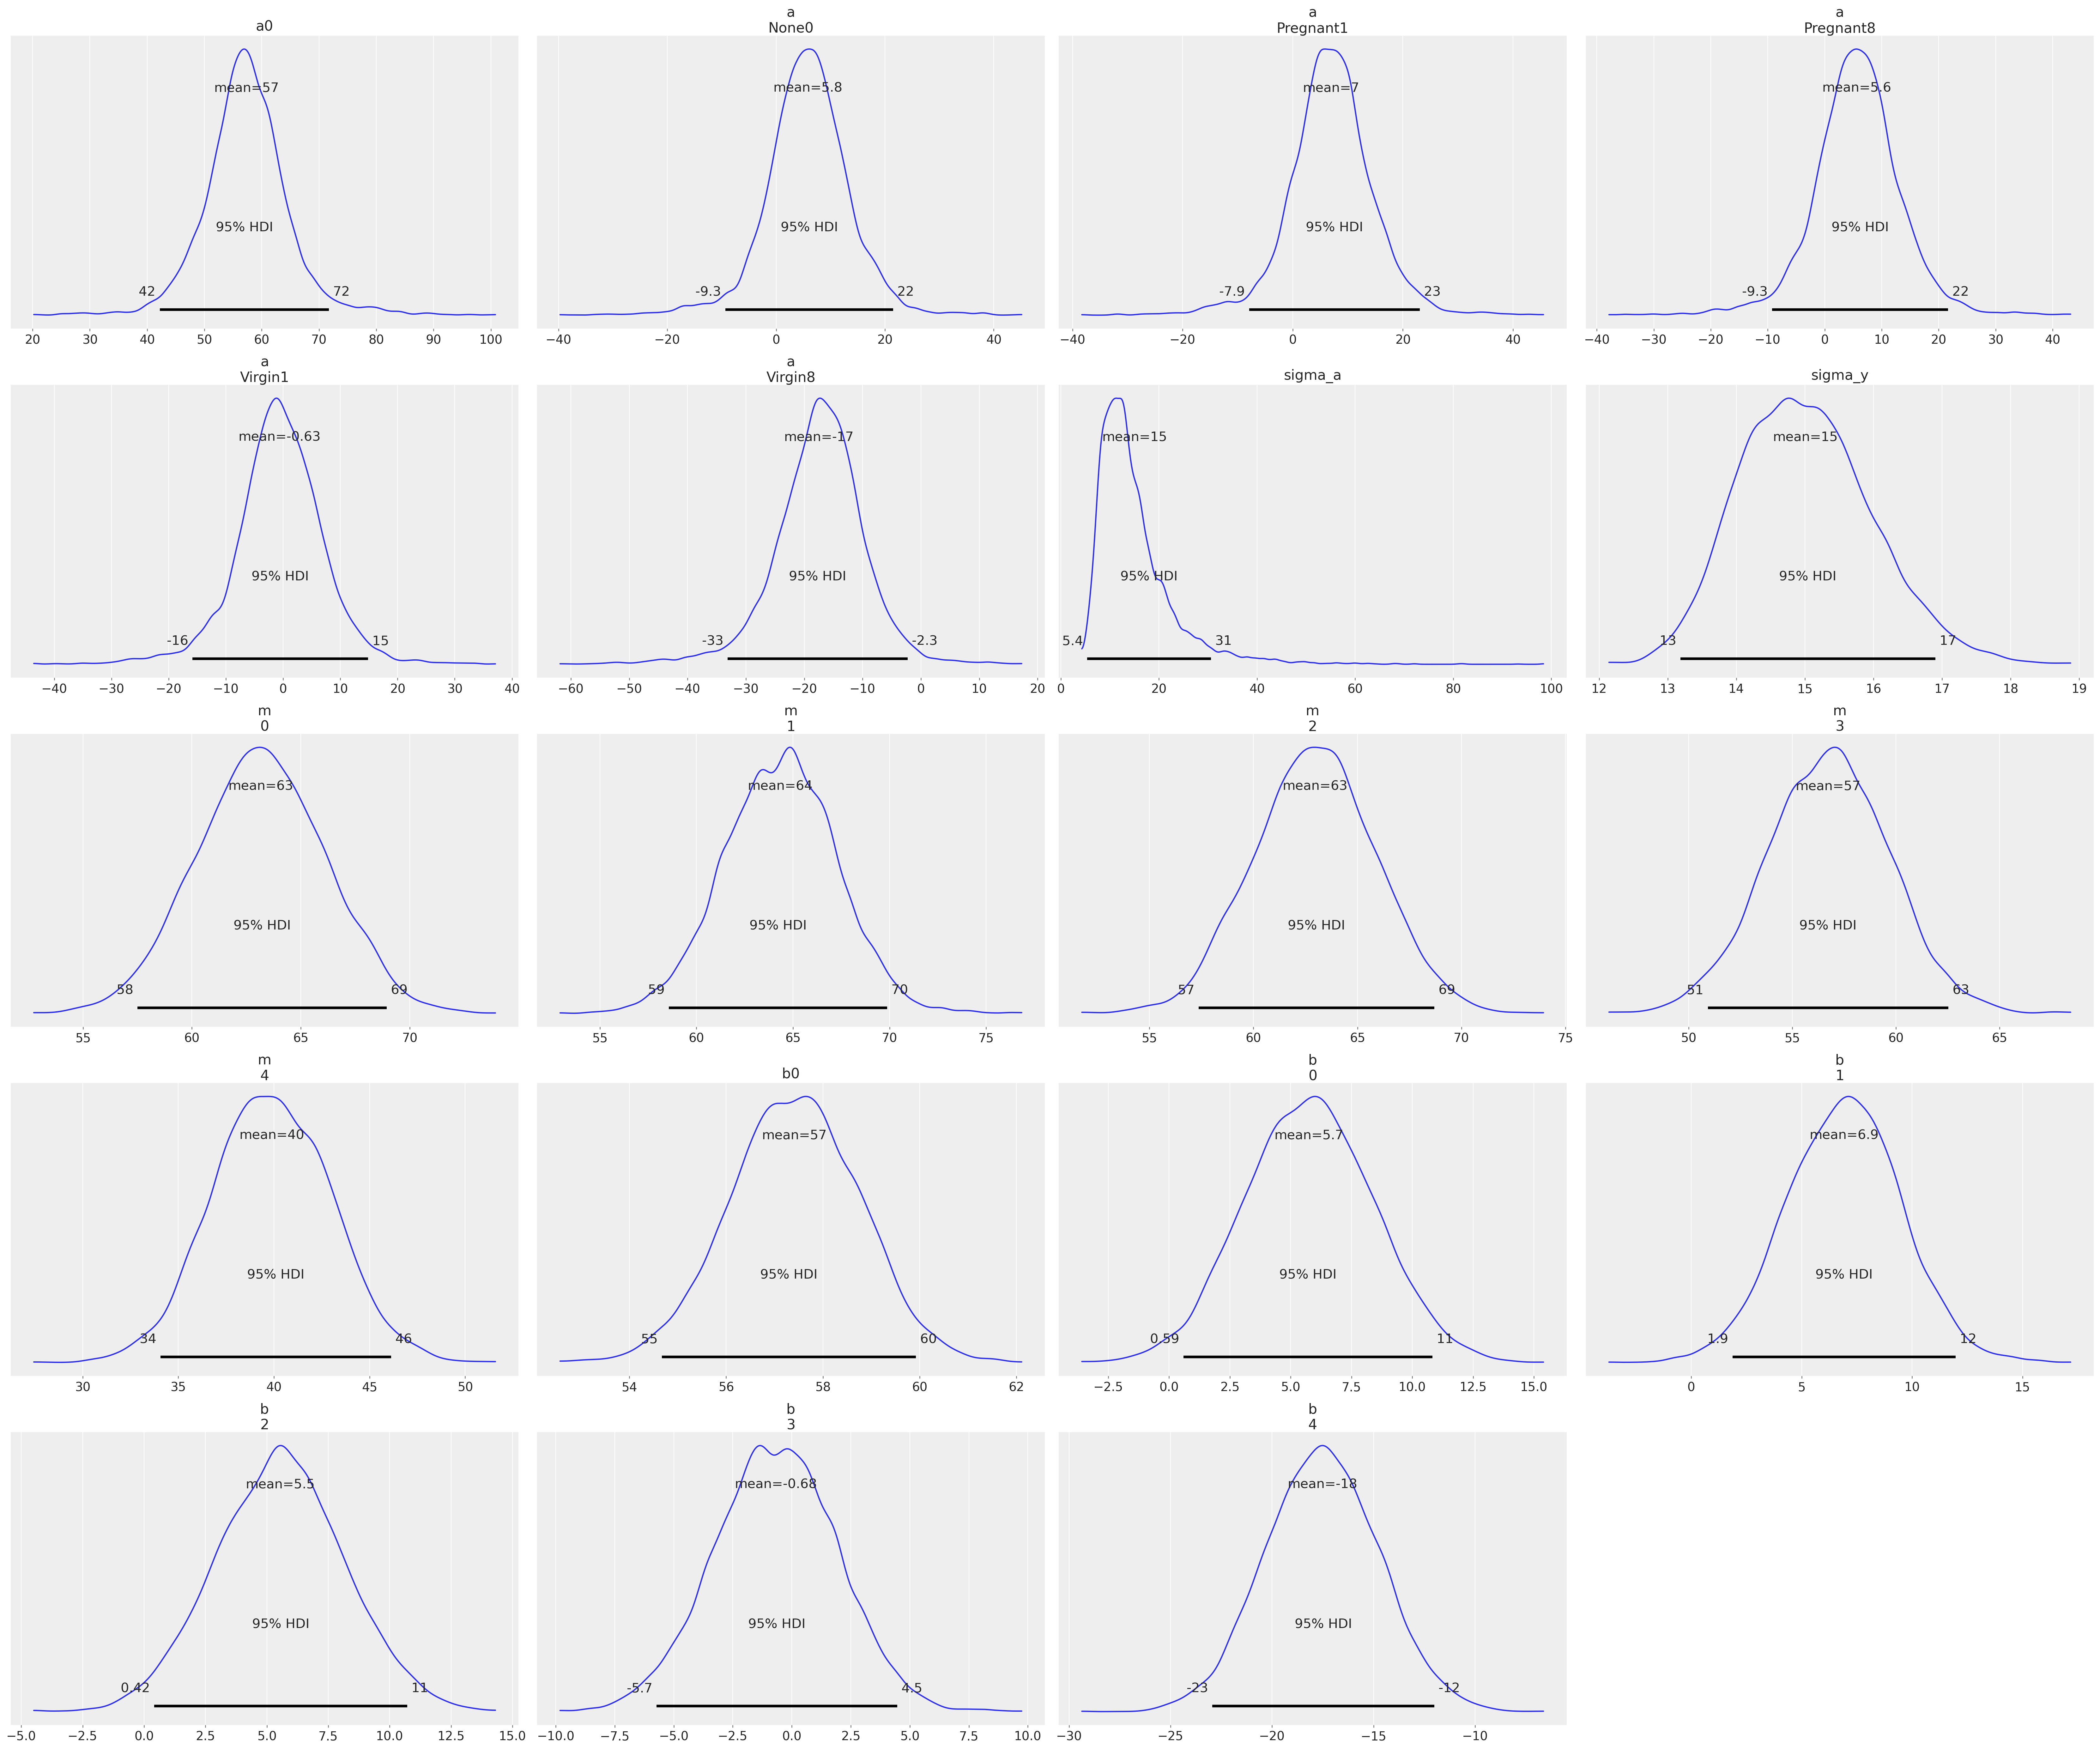

In [9]:
az.plot_posterior(idata);

In [43]:
post = idata.posterior
post

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 2000, groups: 5, m_dim_0: 5, b_dim_0: 5)
Coordinates:
  * chain    (chain) int64 0 1 2 3
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 1993 1994 1995 1996 1997 1998 1999
  * groups   (groups) <U9 'None0' 'Pregnant1' 'Pregnant8' 'Virgin1' 'Virgin8'
  * m_dim_0  (m_dim_0) int64 0 1 2 3 4
  * b_dim_0  (b_dim_0) int64 0 1 2 3 4
Data variables:
    a0       (chain, draw) float64 55.28 56.09 52.91 54.62 ... 52.83 51.6 52.65
    a        (chain, draw, groups) float64 5.588 7.4 6.002 ... 4.867 -10.77
    sigma_a  (chain, draw) float64 6.772 7.857 13.99 8.563 ... 14.24 13.2 10.2
    sigma_y  (chain, draw) float64 14.72 14.75 13.98 13.94 ... 14.52 15.54 15.15
    m        (chain, draw, m_dim_0) float64 60.86 62.68 61.28 ... 57.52 41.88
    b0       (chain, draw) float64 56.09 56.19 56.66 58.34 ... 58.06 56.21 57.14
    b        (chain, draw, b_dim_0) float64 4.778 6.59 5.192 ... 0.3778 -15.26
Attributes:
    created_at:                 2022-11-08T19:58:43.630172
    arviz_version:              0.13.0
    inference_library:          pymc
    inference_library_version:  4.2.2
    sampling_time:              28.532088041305542
    tuning_steps:               1000

In [44]:
stacked = az.extract(post)
stacked

<xarray.Dataset>
Dimensions:  (sample: 8000, groups: 5, m_dim_0: 5, b_dim_0: 5)
Coordinates:
  * groups   (groups) <U9 'None0' 'Pregnant1' 'Pregnant8' 'Virgin1' 'Virgin8'
  * m_dim_0  (m_dim_0) int64 0 1 2 3 4
  * b_dim_0  (b_dim_0) int64 0 1 2 3 4
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999
Data variables:
    a0       (sample) float64 55.28 56.09 52.91 54.62 ... 55.11 52.83 51.6 52.65
    a        (groups, sample) float64 5.588 6.776 8.165 ... -10.03 -14.31 -10.77
    sigma_a  (sample) float64 6.772 7.857 13.99 8.563 ... 12.53 14.24 13.2 10.2
    sigma_y  (sample) float64 14.72 14.75 13.98 13.94 ... 14.52 15.54 15.15
    m        (m_dim_0, sample) float64 60.86 62.86 61.08 ... 42.8 37.29 41.88
    b0       (sample) float64 56.09 56.19 56.66 58.34 ... 58.06 56.21 57.14
    b        (b_dim_0, sample) float64 4.778 6.67 4.423 ... -15.26 -18.91 -15.26
Attributes:
    created_at:                 2022-11-08T19:58:43.630172
    arviz_version:              0.13.0
    inference_library:          pymc
    inference_library_version:  4.2.2
    sampling_time:              28.532088041305542
    tuning_steps:               1000

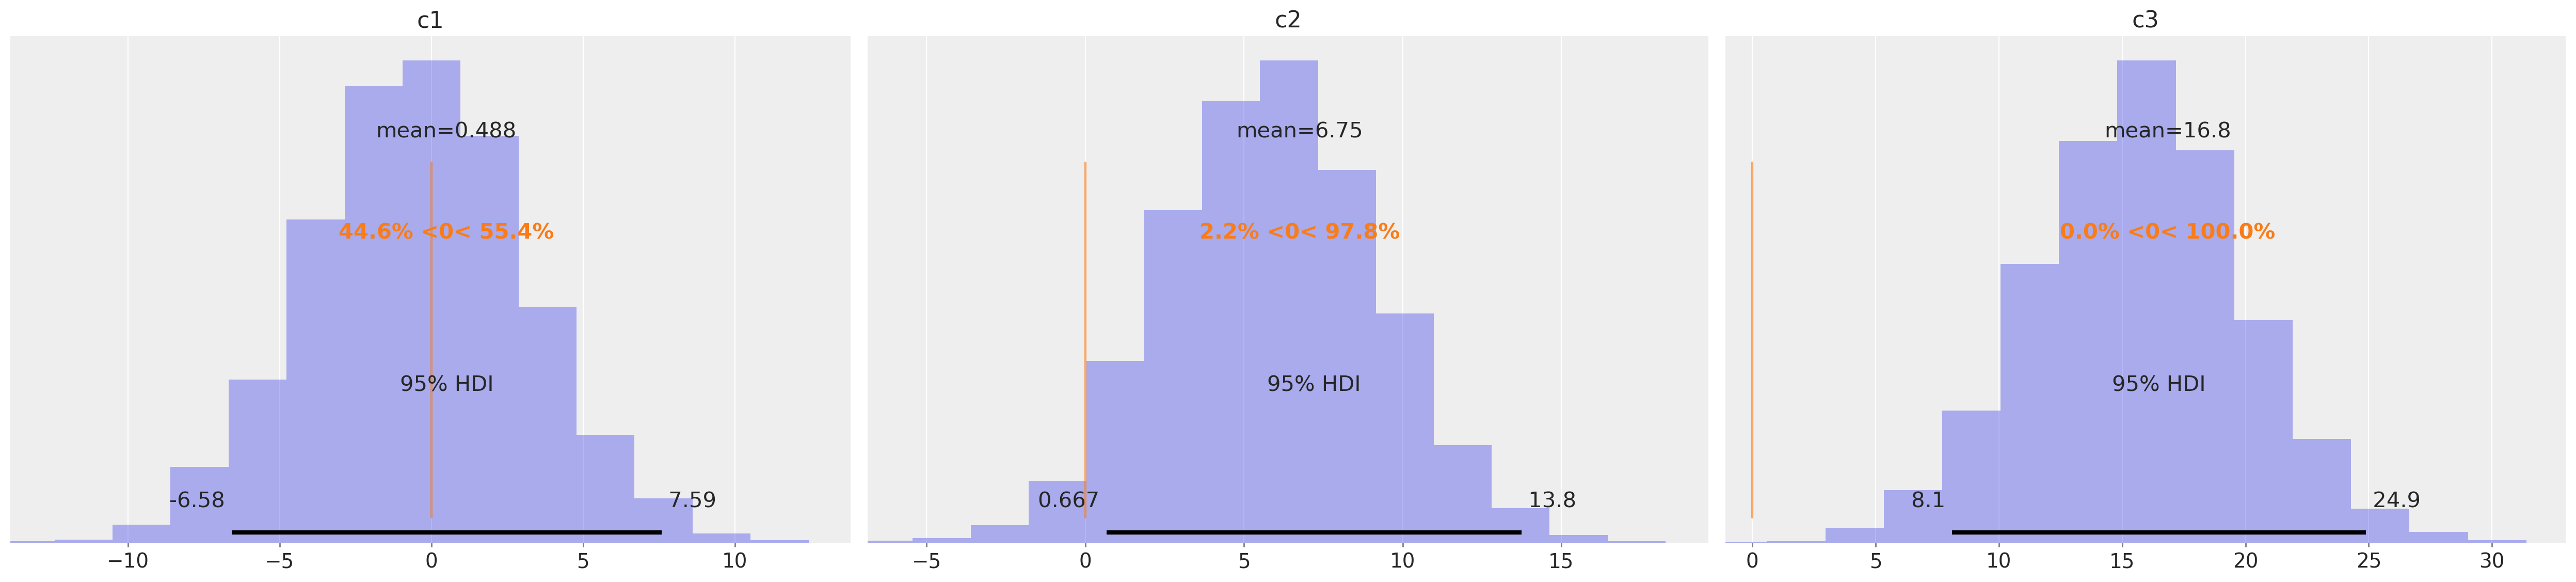

In [97]:
# Contrasts
contrasts = dict(c1=(stacked.a.sel(groups=["Pregnant1", "Pregnant8"]).mean(axis=0) - stacked.a.sel(groups="None0")).values,
             c2=(stacked.a.sel(groups=["Pregnant1", "Pregnant8", "None0"]).mean(axis=0) - stacked.a.sel(groups="Virgin1")).values,
             c3=(stacked.a.sel(groups=["Virgin1"]).values - stacked.a.sel(groups=["Virgin8"]).values).flatten())
contrasts
az.plot_posterior(contrasts, kind="hist", round_to=3, ref_val=0);

In [92]:
# c3 = (stacked.a.sel(groups=["Pregnant1", "Pregnant8"]).mean(axis=0) - stacked.a.sel(groups="None0")).values
c3=(stacked.a.sel(groups=["Virgin1"]).values - stacked.a.sel(groups=["Virgin8"]).values).flatten()
c3.shape


(8000,)

In [84]:
stacked.a.sel(groups=["None0"])

<xarray.DataArray 'a' (groups: 1, sample: 8000)>
array([[ 5.58791877,  6.77621609,  8.16547285, ..., 14.39689738,
         5.84811244,  8.53153396]])
Coordinates:
  * groups   (groups) <U9 'None0'
  * sample   (sample) object MultiIndex
  * chain    (sample) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 3 3 3 3
  * draw     (sample) int64 0 1 2 3 4 5 6 ... 1993 1994 1995 1996 1997 1998 1999